# Import libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf

In [2]:
# Constants
IMG_SHAPE = (28, 28, 1) # Image shape
IMG_SIZE = (-1, 28, 28, 1) # Image shape + batch size
NUM_CLASSES = 10 # Number of classes (0 ... 9)
MAX_EPOCHS = 100 # Maximal number of epochs to run training
BATCH_SIZE = 128 # Training batch size

# Import data

In [3]:
# Load data
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [4]:
# Print data fields to see data format
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# One-hot encode labels
labels = train['label']
Y_train = tf.keras.utils.to_categorical(labels, NUM_CLASSES)

# Get images
X_train = train.drop(['label'], axis=1) # Drop label column
X_test = test

print(Y_train.shape)
print(X_train.shape)
print(X_test.shape)

(42000, 10)
(42000, 784)
(28000, 784)


Values / Amount
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

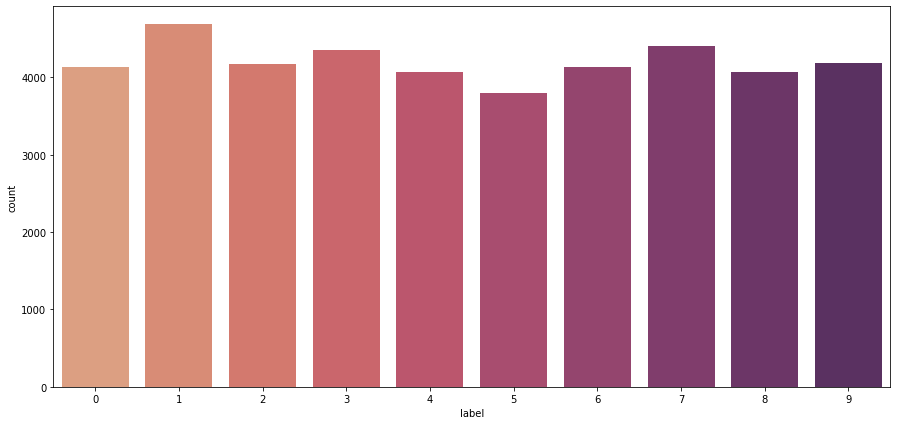

In [7]:
# Check data values and frequencies
print('Values / Amount')
print(labels.value_counts())

plt.figure(figsize=(15,7))
sns.countplot(x=labels, palette='flare')

# Data preperation

In [8]:
# Normalize and reshape
X_train = X_train.values.reshape(IMG_SIZE)
X_test = X_test.values.reshape(IMG_SIZE)

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [9]:
# Split training data to train/validation sets
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600, 10)
(8400, 10)


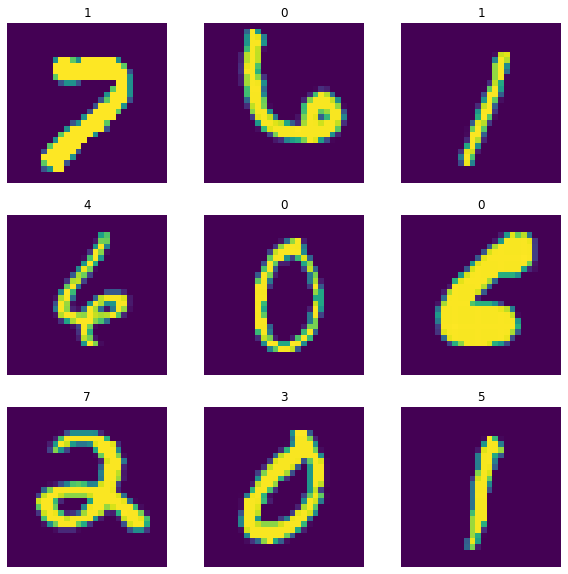

In [10]:
# Show sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    image = x_train[i]
    label = labels[i]

    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(label)
    plt.axis("off")

In [11]:
# Augment data using data generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
)

# Model

In [12]:
# Create simple conv model
def createModel():
    # Input
    inputs = tf.keras.Input(shape=IMG_SHAPE)

    # Conv layers
    x = tf.keras.layers.Conv2D(32, 3, activation='relu')(inputs)
    x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(2)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    
    x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(2)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    
    x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(2)(x)
    x = tf.keras.layers.BatchNormalization()(x)

    # Flatten
    x = tf.keras.layers.Flatten()(x)

    # Dense layers
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    # Output
    outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)

    # Create model
    return tf.keras.Model(inputs=inputs, outputs=outputs)

model = createModel()

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496 

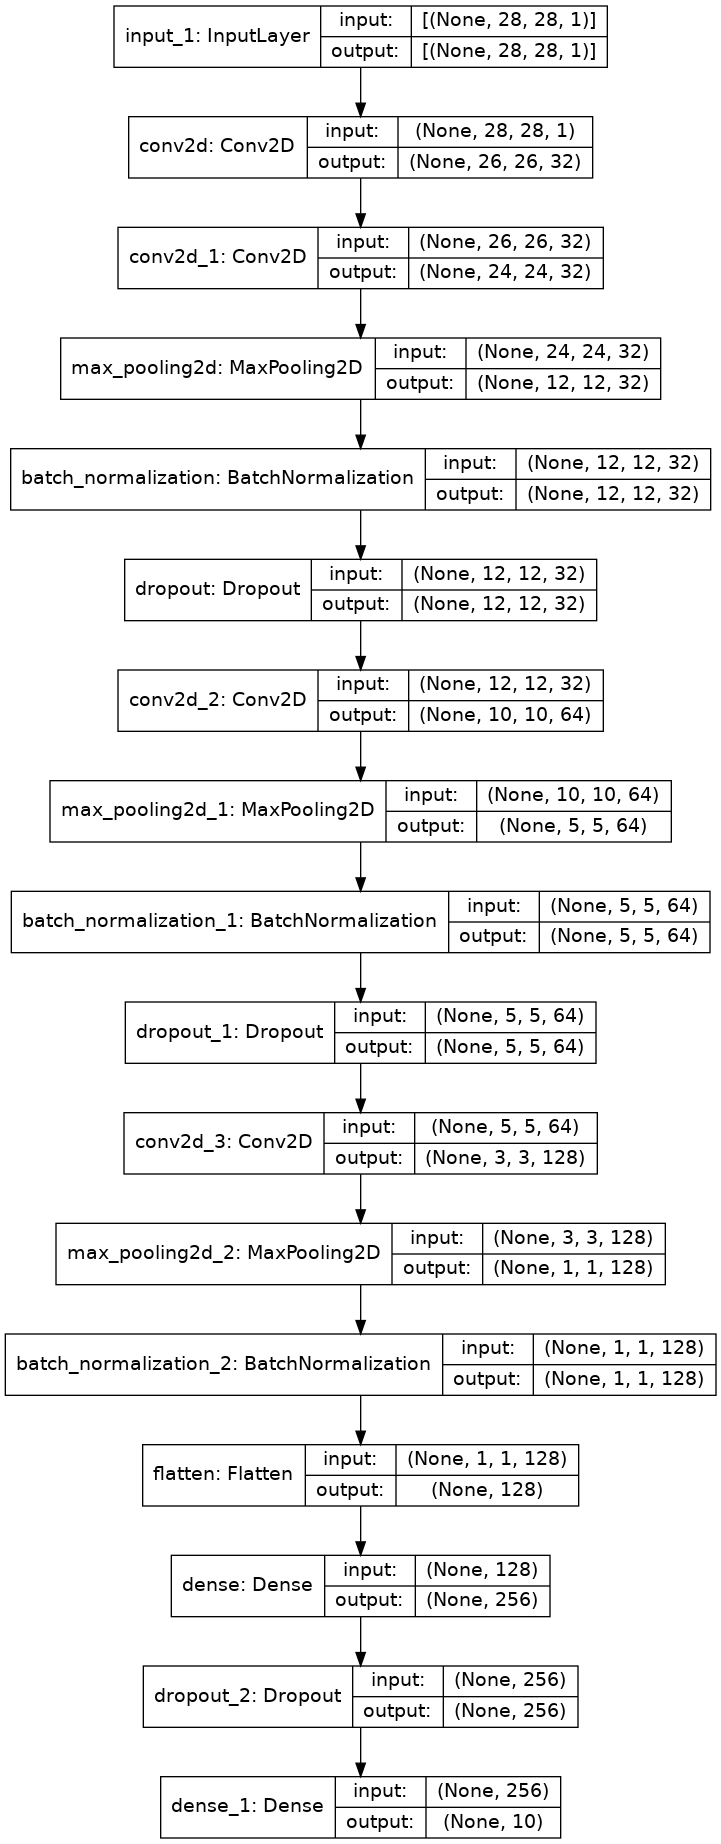

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [15]:
# Compile
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [16]:
# Define early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [17]:
# Fit
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
    validation_data=(x_val, y_val),
    epochs=MAX_EPOCHS,
    callbacks=[early_stop]
)

Epoch 1/100
263/263 [==============================] - 49s 183ms/step - loss: 0.7572 - accuracy: 0.7572 - val_loss: 1.5330 - val_accuracy: 0.2645
Epoch 2/100
263/263 [==============================] - 47s 178ms/step - loss: 0.1388 - accuracy: 0.9571 - val_loss: 0.0595 - val_accuracy: 0.9852
Epoch 3/100
263/263 [==============================] - 47s 178ms/step - loss: 0.1023 - accuracy: 0.9680 - val_loss: 0.0489 - val_accuracy: 0.9855
Epoch 4/100
263/263 [==============================] - 47s 179ms/step - loss: 0.0830 - accuracy: 0.9756 - val_loss: 0.0443 - val_accuracy: 0.9868
Epoch 5/100
263/263 [==============================] - 47s 178ms/step - loss: 0.0755 - accuracy: 0.9781 - val_loss: 0.0390 - val_accuracy: 0.9887
Epoch 6/100
263/263 [==============================] - 47s 179ms/step - loss: 0.0632 - accuracy: 0.9803 - val_loss: 0.0338 - val_accuracy: 0.9908
Epoch 7/100
263/263 [==============================] - 47s 178ms/step - loss: 0.0623 - accuracy: 0.9804 - val_loss: 0.0321 -

# Evaluate

In [18]:
# Loss and accuracy on training data (no augmentation)
model.evaluate(x_train, y_train) # 99.76%

1050/1050 [==============================] - 11s 10ms/step - loss: 0.0091 - accuracy: 0.9969


[0.009060714393854141, 0.9969047904014587]

In [19]:
# Loss and accuracy on validation data
model.evaluate(x_val, y_val) # 99.37%%

263/263 [==============================] - 3s 10ms/step - loss: 0.0290 - accuracy: 0.9927


[0.028975557535886765, 0.9927380681037903]

In [20]:
# Plot accuracy and loss metrics
def plotMetrics(history, epoch_start = 0):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(epochs_range[2:], acc[2:], label='Training Accuracy')
    plt.plot(epochs_range[2:], val_acc[2:], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(epochs_range[2:], loss[2:], label='Training Loss')
    plt.plot(epochs_range[2:], val_loss[2:], label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

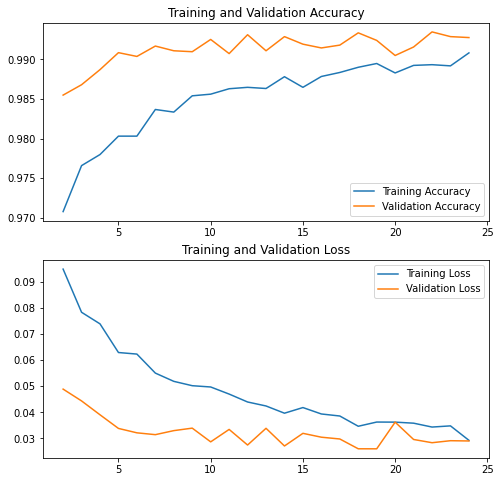

In [21]:
plotMetrics(history)

In [22]:
# Confusion matrix
y_pred = model(x_val) # Predict validation set
y_pred_classes = np.argmax(y_pred, axis=1) # Get prediction values as numbers
y_val_classes = np.argmax(y_val, axis=1) # Get true values as numbers

confusion = confusion_matrix(y_val_classes, y_pred_classes) # Create confusion matrix

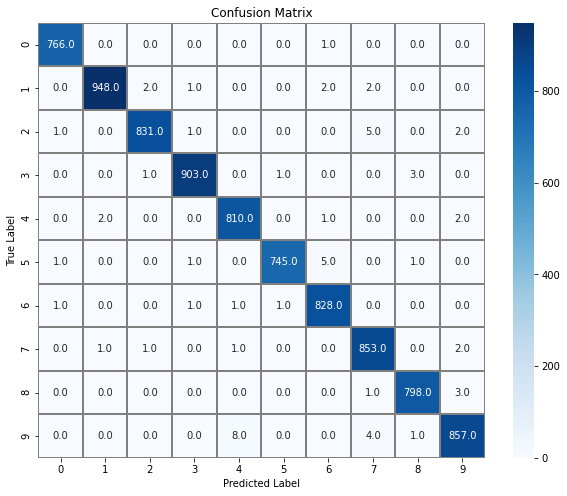

In [23]:
# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion, annot=True, linewidths=0.01, cmap='Blues',linecolor='gray', fmt= '.1f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Submition data

In [24]:
# Predict test data
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)

In [25]:
Y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [26]:
# Prepare data for submission
submission = pd.DataFrame({'ImageId': range(1, 28001), 'Label': Y_pred})

submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [27]:
# Save data
submission.to_csv('submission.csv', index=False)